In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pizza_df = pd.read_csv("pizza_data.csv")

In [4]:
sns.set()

In [5]:
pizza_df.columns

Index(['_distance', 'address1', 'address2', 'categories', 'city', 'country',
       'createdAt', 'deleted', 'featuredMedia.__t', 'featuredMedia.__v',
       'featuredMedia._id', 'featuredMedia.assetId', 'featuredMedia.createdAt',
       'featuredMedia.deleted', 'featuredMedia.id',
       'featuredMedia.metadata.aspectRatio', 'featuredMedia.metadata.duration',
       'featuredMedia.metadata.frameRate', 'featuredMedia.metadata.resolution',
       'featuredMedia.modifiedAt', 'featuredMedia.playbackId',
       'featuredMedia.reviewId', 'featuredMedia.sourceUrl',
       'featuredMedia.status', 'featuredMedia.streams.hls',
       'featuredMedia.streams.mp4', 'featuredMedia.thumbnails.large',
       'featuredMedia.thumbnails.medium', 'featuredMedia.thumbnails.small',
       'featuredMedia.type', 'featuredMedia.user', 'id', 'imageUrl',
       'loc.coordinates', 'loc.type', 'modifiedAt', 'name', 'openHours',
       'orderProvider', 'orderProvider.checkoutUrl',
       'orderProvider.internalId',

In [39]:
cities_df = pizza_df.groupby('city')['reviewStats.dave.averageScore'].agg({'score':'mean', 'review_count':'size'})

/usr/local/Cellar/ipython/6.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [40]:
cities_df.reset_index(level=0, inplace=True)

In [68]:
cities_df = cities_df[cities_df['review_count'] >= 10].sort_values(by='review_count')

In [69]:
cities_df

,city,score,review_count
48,Las Vegas,5.109091,11
7,Boston,6.903077,13
11,Brooklyn,7.870000,20
64,New York,6.480398,251


In [70]:
filtered_pizza = pizza_df[pizza_df['city'].isin(cities_df['city'])]

In [72]:
filtered_pizza['dave_average_score'] = filtered_pizza['reviewStats.dave.averageScore']

/usr/local/Cellar/ipython/6.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


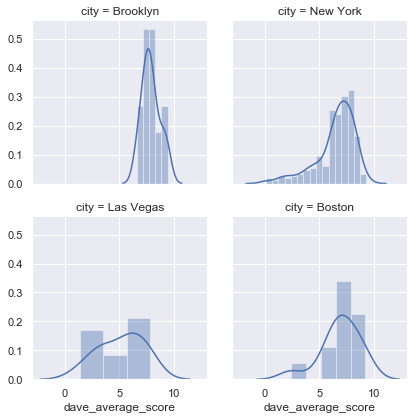

In [73]:
g = sns.FacetGrid(filtered_pizza, col="city", col_wrap=2)
g = g.map(sns.distplot, "dave_average_score")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

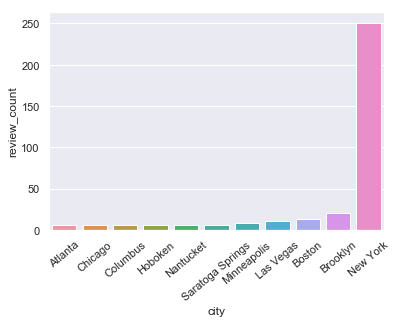

In [49]:
sns.barplot(x=cities_df['city'], y = cities_df['review_count'])
plt.xticks(rotation=40)

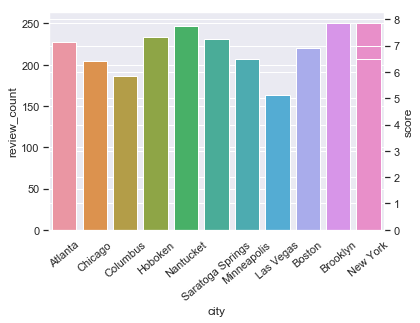

In [48]:
ax2=plt.twinx()
sns.barplot(x=cities_df['city'], y = cities_df['score'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

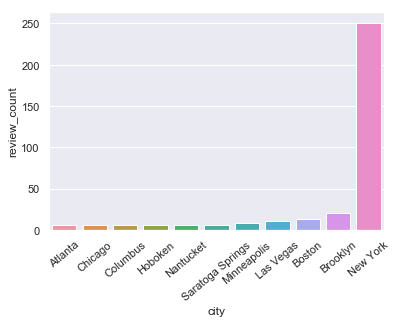

In [45]:
import matplotlib.pyplot as plt
sns.lineplot(data=df.column1, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df.column2, color="b", ax=ax2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

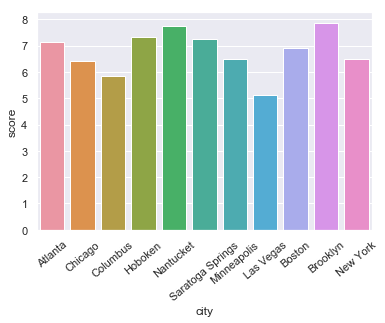

In [47]:
sns.barplot(x=cities_df['city'], y = cities_df['score'])
plt.xticks(rotation=40)

In [5]:
types = ['reviewStats.dave.averageScore', 'reviewStats.community.averageScore']

in some way, we can say that there is a true distribution of pizza quality in NYC that follows some statistical distribution. Each individual's sample score carries with them their perceived pizza quality distribution, and both the aggregated quality scores and a single individual's score across location can tell us about this distribution. Do people average their scores at 5 and then deviate on quality? Is this distribution normal? What does a 7 really mean?  
What we can do here is estimate what is called the pdf of the distribution of the data from a small number of samples using a nonparametric method called kernel density estimation. Here's the KDE for both the 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Propensity')

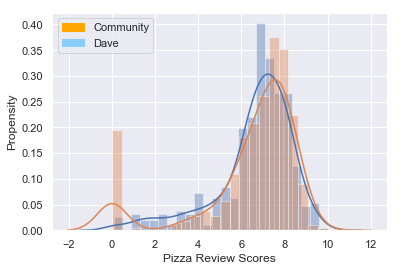

In [15]:
#what we want to do is es
fig, ax = plt.subplots()
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

orange_patch = mpatches.Patch(color='orange', label='Community')
blue_patch = mpatches.Patch(color='lightskyblue', label='Dave')



for col in types:
    sns.distplot(pizza_df[col], ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.legend(handles=[orange_patch, blue_patch])
plt.xlabel("Pizza Review Scores")
plt.ylabel("Propensity")

In [11]:
pizza_df[pizza_df['reviewStats.dave.averageScore']<1]

,_distance,address1,address2,categories,city,country,createdAt,deleted,featuredMedia.__t,featuredMedia.__v,...,input_string,latitude,longitude,number_of_results,postcode,response.error_message,response.results,response.status,status,type.1
65,350196.796139,1045 Goss Ave,NaN,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",Louisville,US,2018-03-23T17:41:43.980Z,False,NaN,NaN,...,"1045 Goss Ave, Louisville,US",38.227671,-85.735416,1,40217.0,NaN,"[{'address_components': [{'long_name': '1045',...",OK,OK,premise
66,351224.954932,700 Central Ave,NaN,"[{'alias': 'stadiumsarenas', 'title': 'Stadium...",Louisville,US,2018-11-02T19:01:56.538Z,False,NaN,NaN,...,"700 Central Ave, Louisville,US",38.204247,-85.771631,1,40215.0,NaN,"[{'address_components': [{'long_name': '700', ...",OK,OK,premise
133,517332.178513,15 William St,NaN,"[{'alias': 'breakfast_brunch', 'title': 'Break...",New York,US,2018-03-23T17:44:41.383Z,False,NaN,NaN,...,"15 William St, New York,US",40.705371,-74.010072,1,10005.0,NaN,"[{'address_components': [{'long_name': '15', '...",OK,OK,street_address
249,404648.989044,153 Ave C,NaN,"[{'alias': 'pizza', 'title': 'Pizza'}]",New York,US,2018-03-23T17:43:07.666Z,False,NaN,NaN,...,"153 Ave C, New York,US",40.725710,-73.977964,1,10009.0,NaN,"[{'address_components': [{'long_name': '153', ...",OK,OK,premise
451,115101.541775,234 W 31st St,NaN,"[{'alias': 'trainstations', 'title': 'Train St...",New York,US,2018-10-25T21:19:28.467Z,False,NaN,NaN,...,"234 W 31st St, New York,US",40.749647,-73.993399,1,10001.0,NaN,"[{'address_components': [{'long_name': '234', ...",OK,OK,street_address


In [19]:
import scipy as sp
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pizza_kde = st.gaussian_kde(pizza_df['dave_score_int'])
sample = pizza_kde.resample(100)

In [ ]:
sample = pizza_kde.resample(1000)

In [21]:
sample=sample/10

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Score')

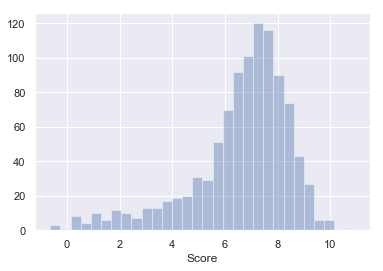

In [22]:
sns.distplot(sample, kde=False)
plt.xlabel("Score")

In [ ]:
ax = sns.distplot(pizza_df['reviewStats.dave.averageScore'], bins=30)
ax.set(xlabel="Dave's Score", ylabel='Propensity')

plt.show()

In [9]:
import math

In [14]:
pizza_df['reviewStats.dave.averageScore'].median()
pizza_df['reviewStats.dave.averageScore'].std()


1.7991706669659808

In [ ]:
pizza_df['reviewStats.dave.averageScore']

In [ ]:
pd.set_option('display.max_columns',500)

In [7]:
import scipy.stats as st
dist = getattr(st, 'norm')
dist.fit(pizza_df['reviewStats.dave.averageScore'])

(6.622721382289416, 1.7972266678386213)

In [ ]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [9]:
pizza_distribution = get_best_distribution(pizza_df['reviewStats.dave.averageScore'])

p value for norm = 1.1493694884734396e-10
p value for exponweib = 0.000855088827936612
p value for weibull_max = 5.501486175507608e-07
p value for weibull_min = 0.009831798280309556
p value for pareto = 0.0
p value for genextreme = 5.50071224569848e-07
Best fitting distribution: weibull_min
Best p value: 0.009831798280309556
Parameters for the best fit: (104112319.81995434, -131621529.5743883, 131621536.96683171)


/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [ ]:
df_cities = pd.DataFrame(pizza_df.groupby('city')['reviewStats.dave.averageScore'].mean())

In [38]:
pd.set_option('display.max_columns', 100)
pizza_df[pizza_df['city'] == "Lynn"]

,_distance,address1,address2,categories,city,country,createdAt,deleted,featuredMedia.__t,featuredMedia.__v,featuredMedia._id,featuredMedia.assetId,featuredMedia.createdAt,featuredMedia.deleted,featuredMedia.id,featuredMedia.metadata.aspectRatio,featuredMedia.metadata.duration,featuredMedia.metadata.frameRate,featuredMedia.metadata.resolution,featuredMedia.modifiedAt,featuredMedia.playbackId,featuredMedia.reviewId,featuredMedia.sourceUrl,featuredMedia.status,featuredMedia.streams.hls,featuredMedia.streams.mp4,featuredMedia.thumbnails.large,featuredMedia.thumbnails.medium,featuredMedia.thumbnails.small,featuredMedia.type,featuredMedia.user,id,imageUrl,loc.coordinates,loc.type,modifiedAt,name,openHours,orderProvider,orderProvider.checkoutUrl,orderProvider.internalId,orderProvider.logo,orderProvider.name,phoneNumber,photos,placeId,priceLevel,providerRating,providerReviewCount,providerTransactions,providerUrl,refreshDate,reviewStats.all.averageScore,reviewStats.all.count,reviewStats.all.totalScore,reviewStats.community.averageScore,reviewStats.community.count,reviewStats.community.totalScore,reviewStats.critic.averageScore,reviewStats.critic.count,reviewStats.critic.totalScore,reviewStats.dave.averageScore,reviewStats.dave.count,reviewStats.dave.totalScore,slug,state,timeZone,type,zip,address_total,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,response.error_message,response.results,response.status,status,type.1,string_concat,dave_score_int
286,291271.444717,141 Eastern Ave,NaN,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",Lynn,US,2018-04-16T20:16:08.314Z,False,NaN,NaN,NaN,Q9owmMXbbO9an4Ba528OBaiiuFWo4kva,2018-07-26T16:51:09.046Z,False,031ed0d6-76ad-4877-9527-6d2802768614,16:9,202.325,30.0,SD,2018-07-26T16:53:00.342Z,NsF8H3Bq01rIa1fMmfM00hQStcdy01NgufG,bc807434-54d5-43df-9c5e-42d826c8e9f8,https://s3.amazonaws.com/one-bite-media-prod/2...,READY,https://stream.mux.com/NsF8H3Bq01rIa1fMmfM00hQ...,https://s3.amazonaws.com/one-bite-media-prod/2...,https://image.mux.com/NsF8H3Bq01rIa1fMmfM00hQS...,https://image.mux.com/NsF8H3Bq01rIa1fMmfM00hQS...,https://image.mux.com/NsF8H3Bq01rIa1fMmfM00hQS...,VIDEO,NaN,5c6d4969-ffe7-4ae3-b657-8b77f15e28b6,https://s3-media2.fl.yelpcdn.com/bphoto/gciaao...,"[-70.92541, 42.47205]",Point,2019-03-18T06:46:03.187Z,Monte's Restaurant,[],NaN,NaN,NaN,NaN,NaN,1.781599e+10,[],F43SpX2oyiTI8waE0zNrPQ,1,3.0,86,[],https://www.yelp.com/biz/montes-restaurant-lyn...,2019-03-10T22:45:17.656Z,8.176471,51,417.0,8.14,50,407.0,0.0,0,0.0,10.0,1,10.0,montes-restaurant-lynn-ma-5c6d4969,MA,America/New_York,RESTAURANT,1902.0,"141 Eastern Ave, Lynn,US",ROOFTOP,"141 Eastern Ave, Lynn, MA 01902, USA",ChIJacqLVrds44kROMfvHVc4-9k,"141 Eastern Ave, Lynn,US",42.472084,-70.925399,1,1902.0,NaN,"[{'address_components': [{'long_name': '141', ...",OK,OK,premise,Monte's Restaurant | Dave - 10.0 | Community -...,100


In [40]:
pizza_df['review_number'] = pizza_df.index

In [43]:
pizza_df.to_csv("pizza_data.csv", index=False)